In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import pdist, squareform
from aging.behavior.pseudotime import compute_nearest_neighbors, diffuse_pseudotime, make_smoothing_mtx

In [4]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_05/ontogeny_males_clean_pseudotime_v02.parquet')

In [7]:
df = df[~df.index.get_level_values('session_name').str.contains("CRL")]

## Chronological age sorting

Text(0.5, 1.0, 'Chronological age sort')

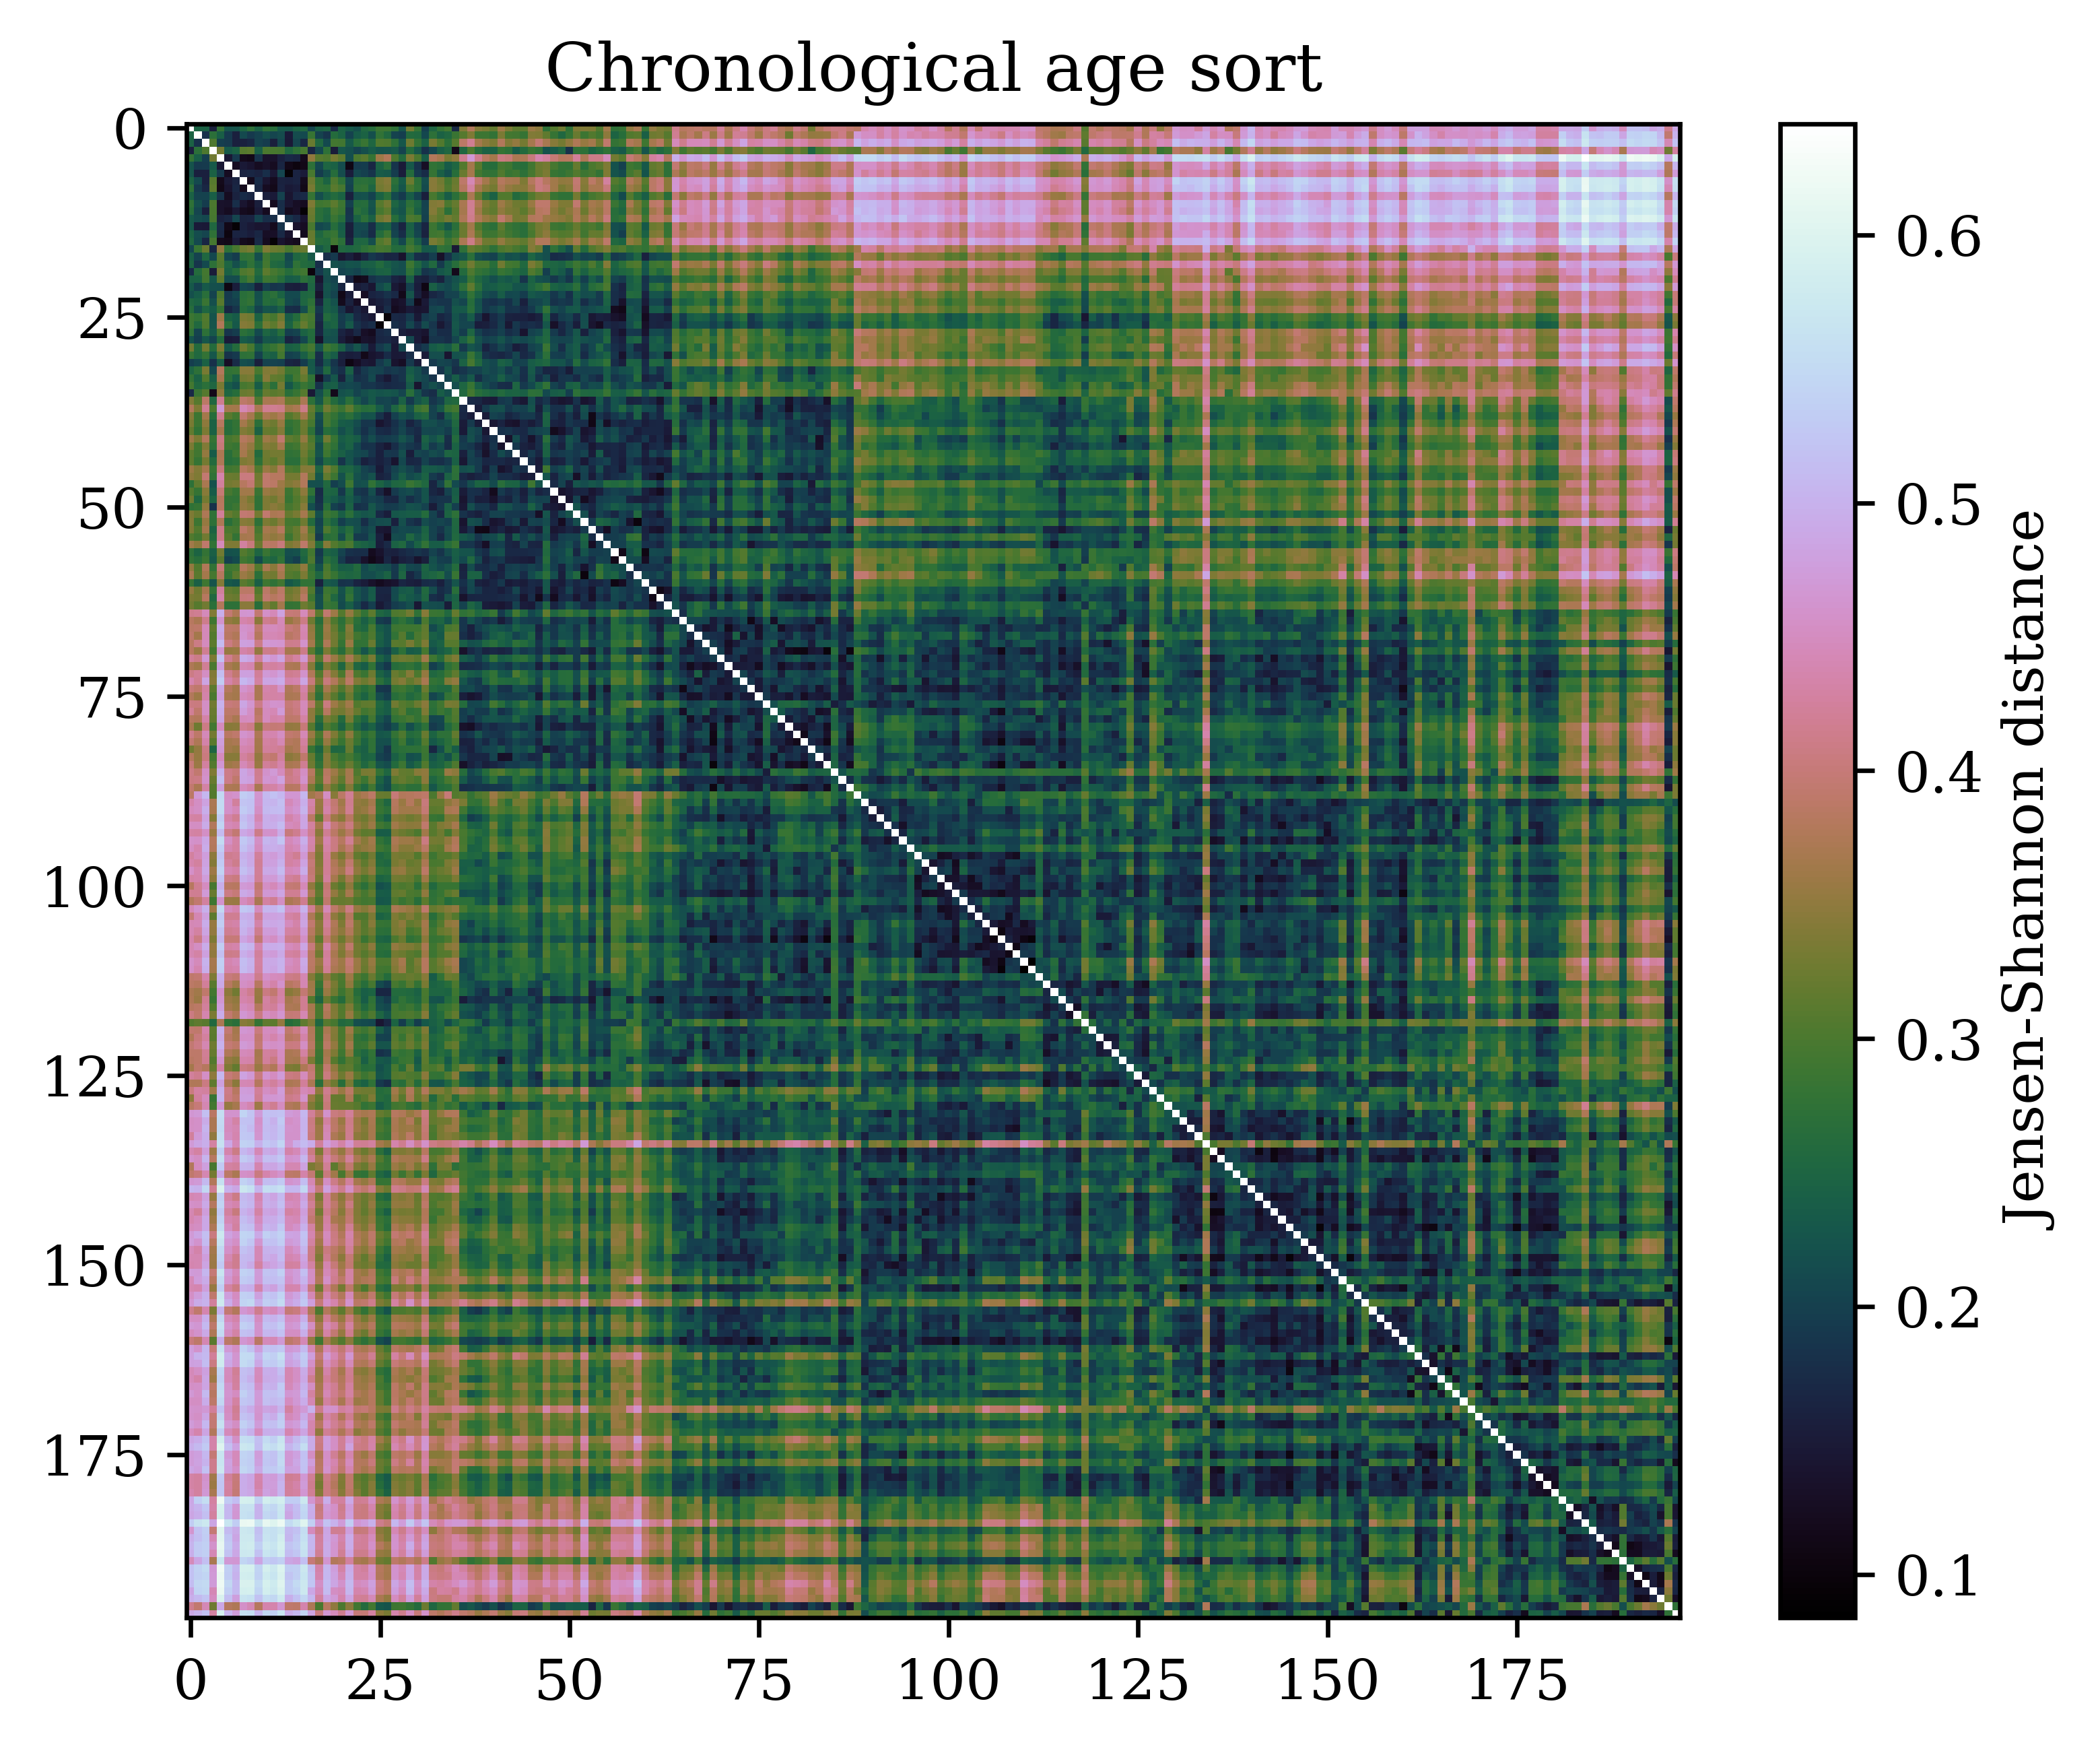

In [21]:
dm = squareform(pdist(df.filter(regex=r'\d'), metric='jensenshannon'))
dm[np.diag_indices_from(dm)] = np.nan

plt.imshow(dm, cmap='cubehelix')
plt.colorbar(label="Jensen-Shannon distance")
plt.title("Chronological age sort")

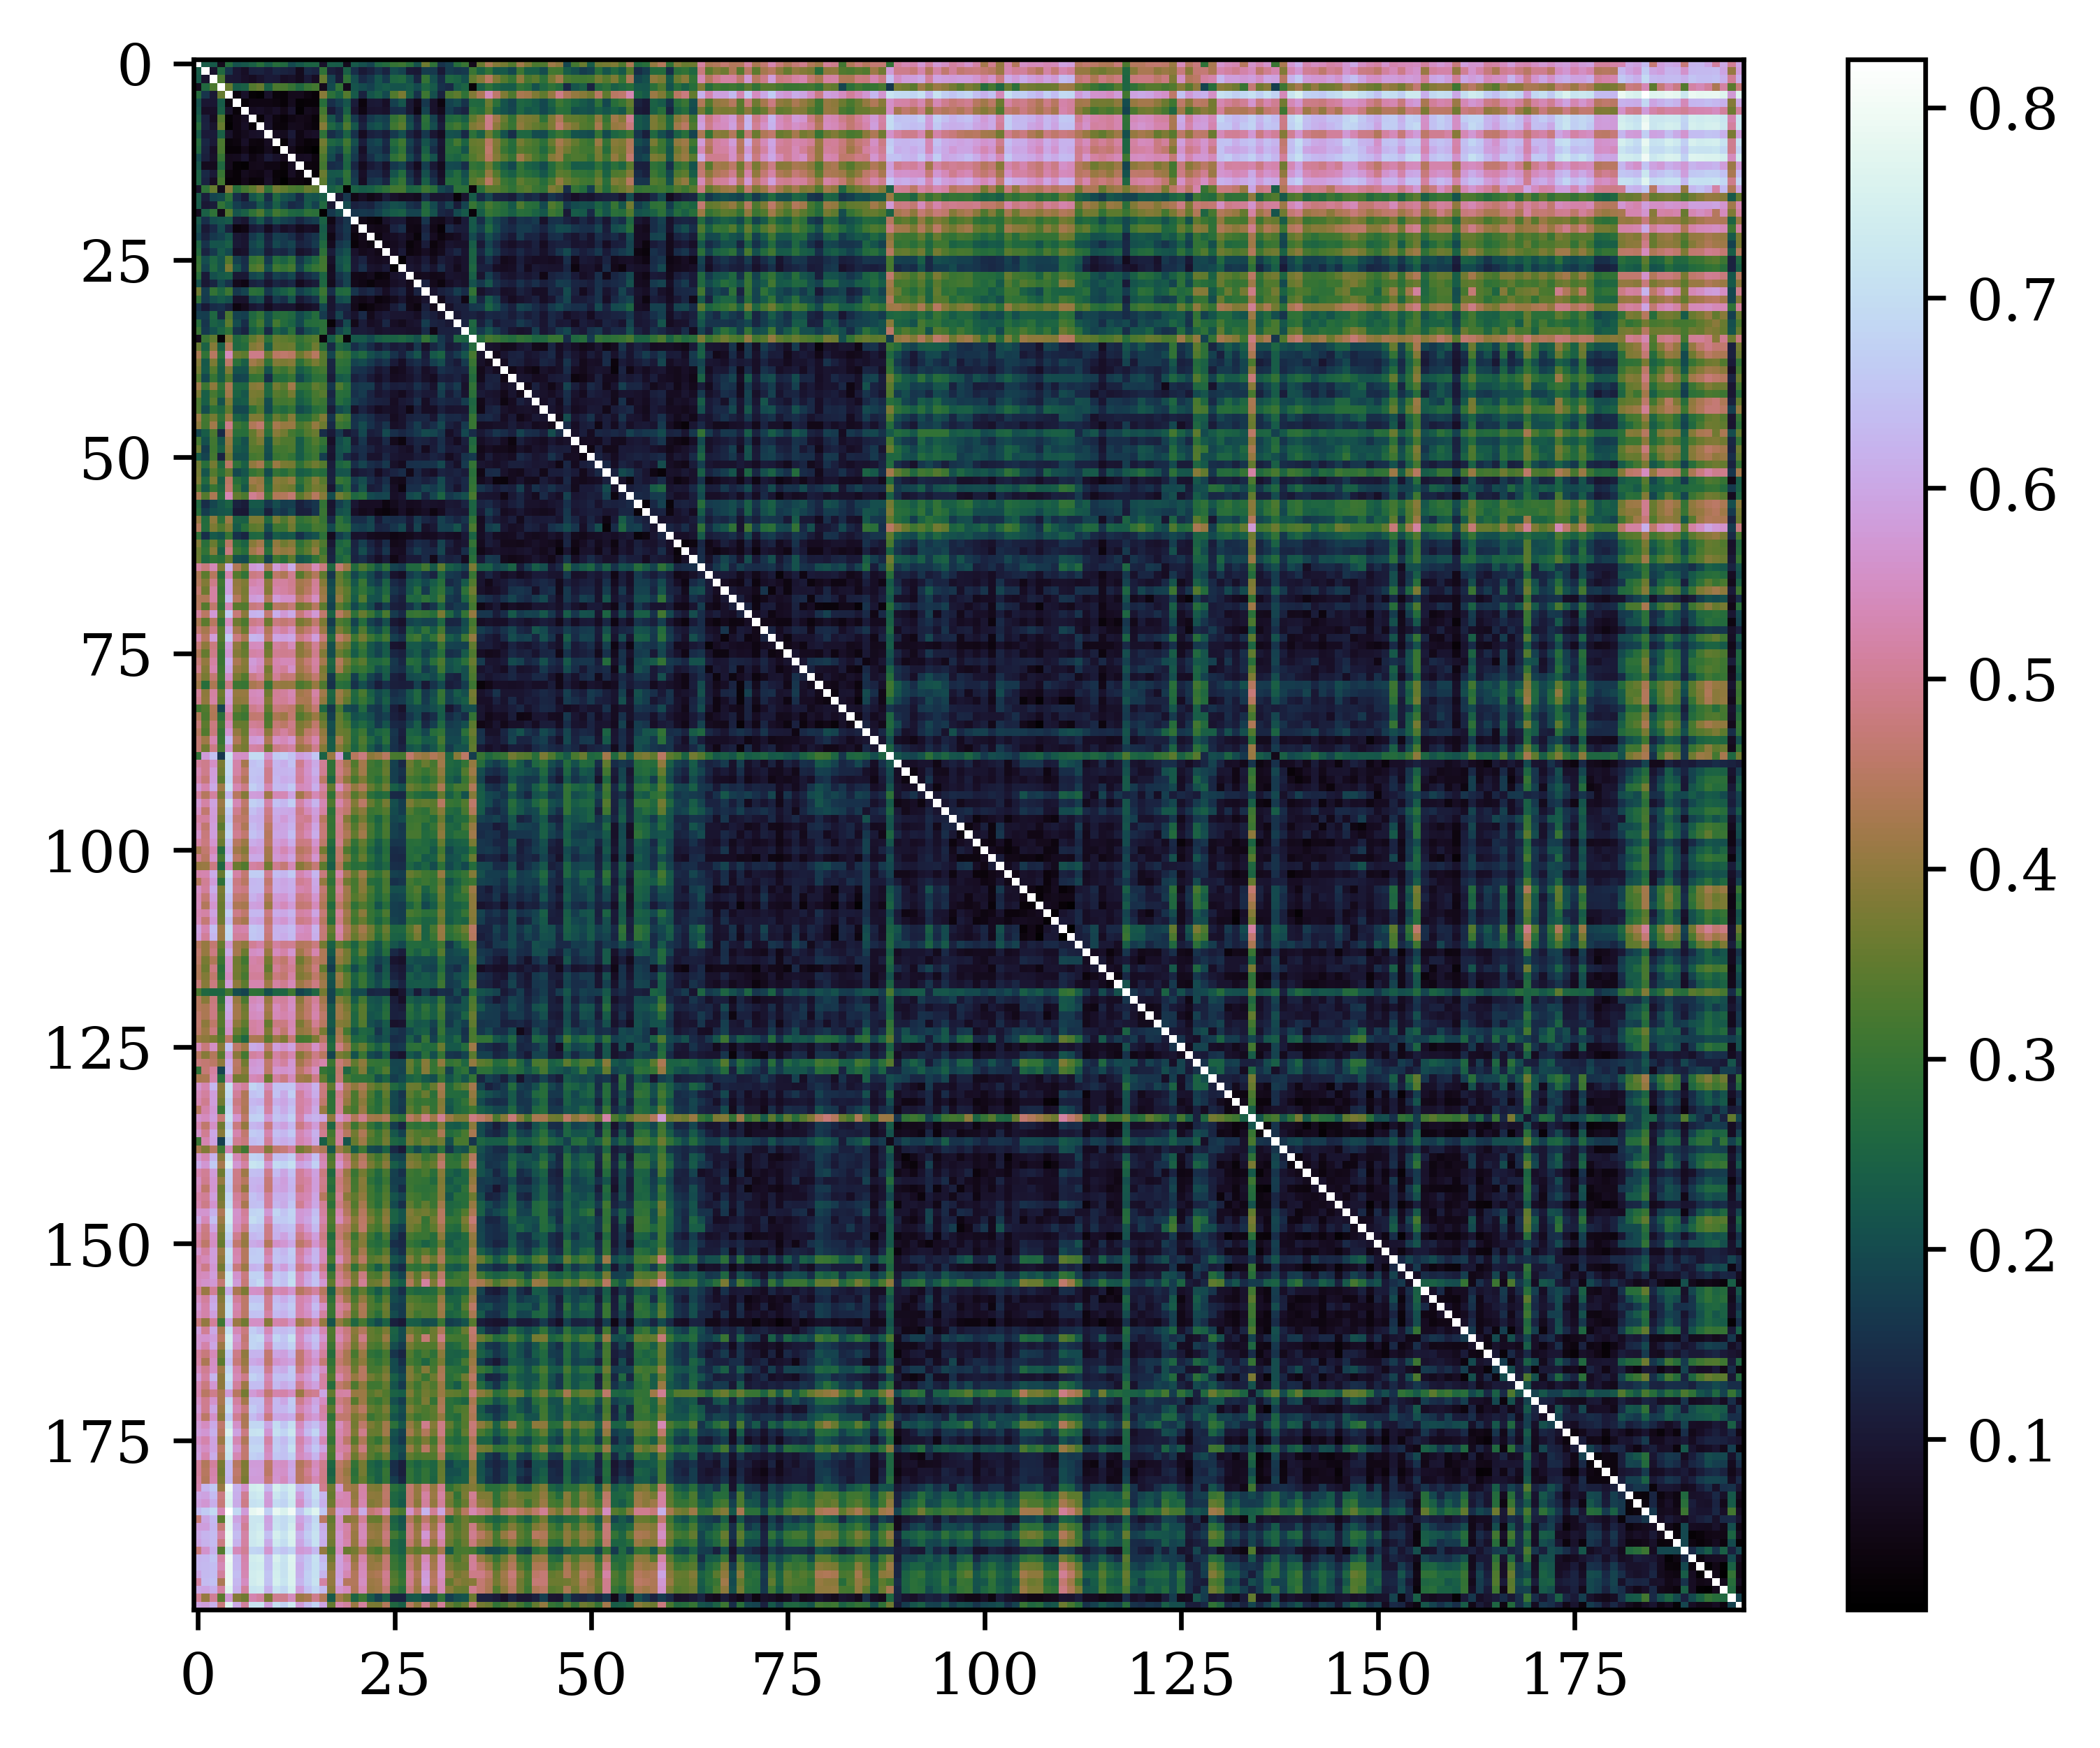

In [17]:
dm = squareform(pdist(df.filter(regex=r'\d'), metric='cosine'))
dm[np.diag_indices_from(dm)] = np.nan

plt.imshow(dm, cmap='cubehelix')
plt.colorbar()

## Pseudo age sorting

Text(0.5, 1.0, 'Pseudo age sort')

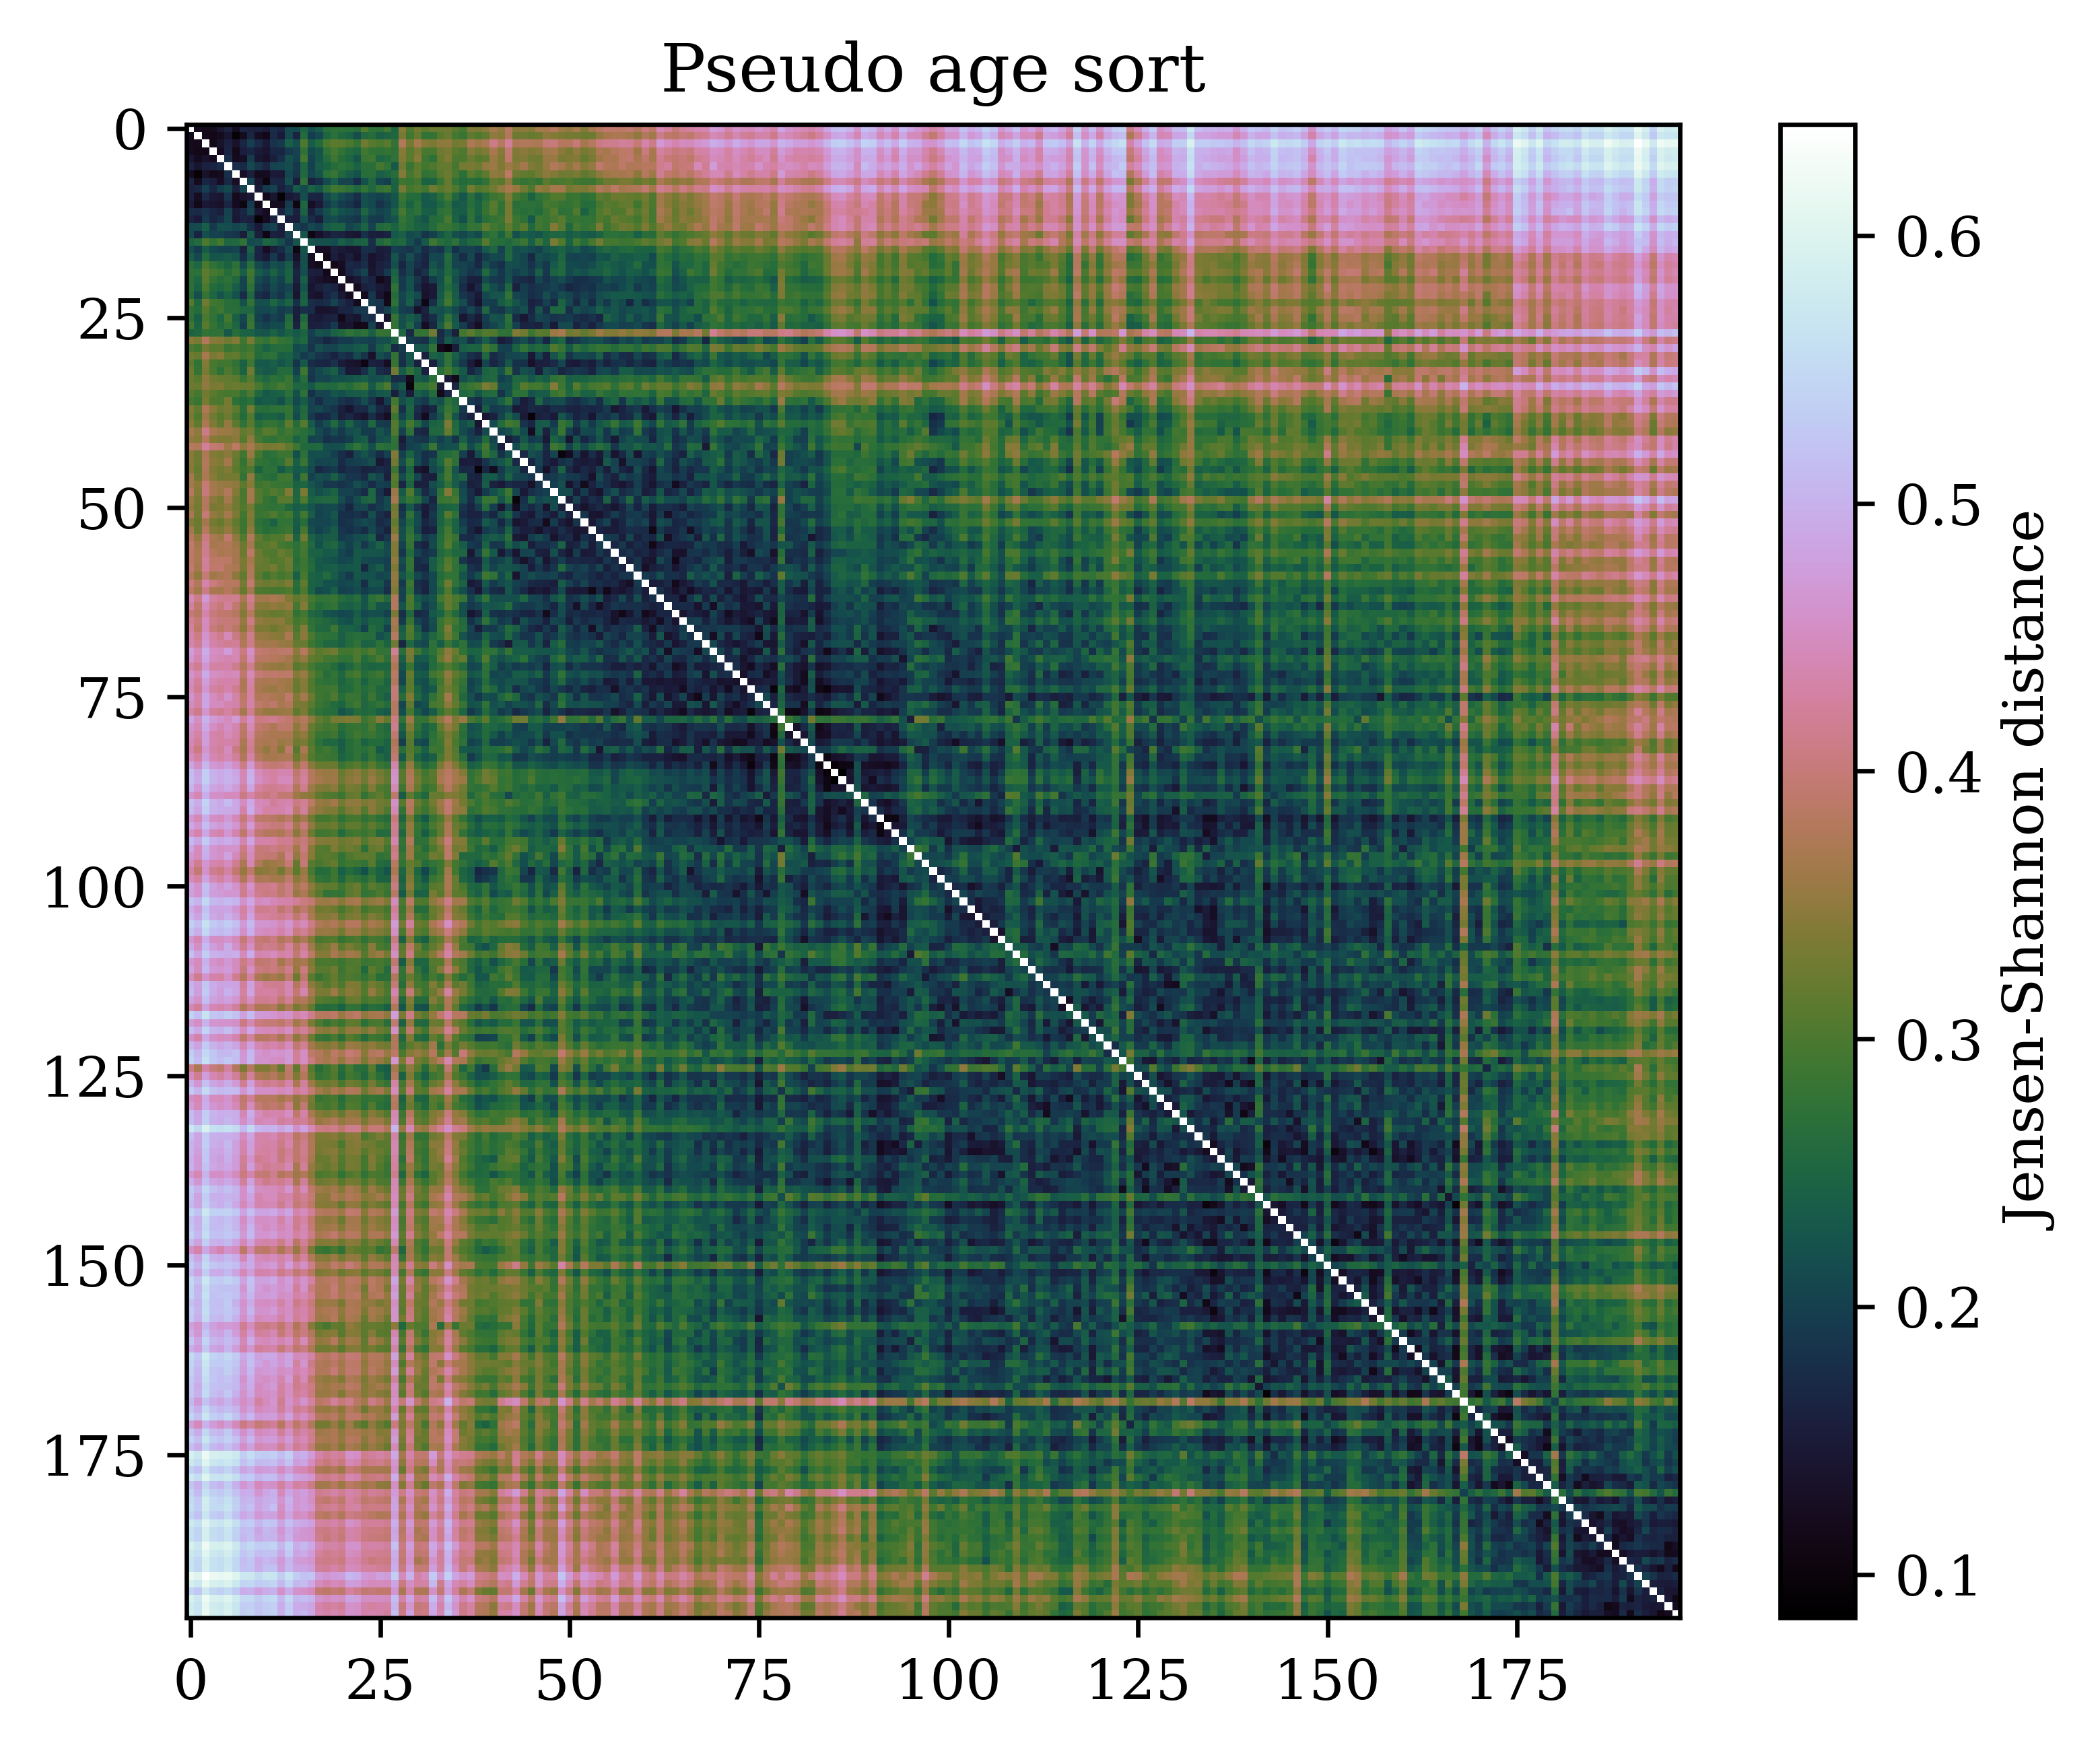

In [22]:
dm = squareform(pdist(df.sort_values(by='pseudotime_rank').filter(regex=r'\d'), metric='jensenshannon'))
dm[np.diag_indices_from(dm)] = np.nan

plt.imshow(dm, cmap='cubehelix')
plt.colorbar(label="Jensen-Shannon distance")
plt.title("Pseudo age sort")

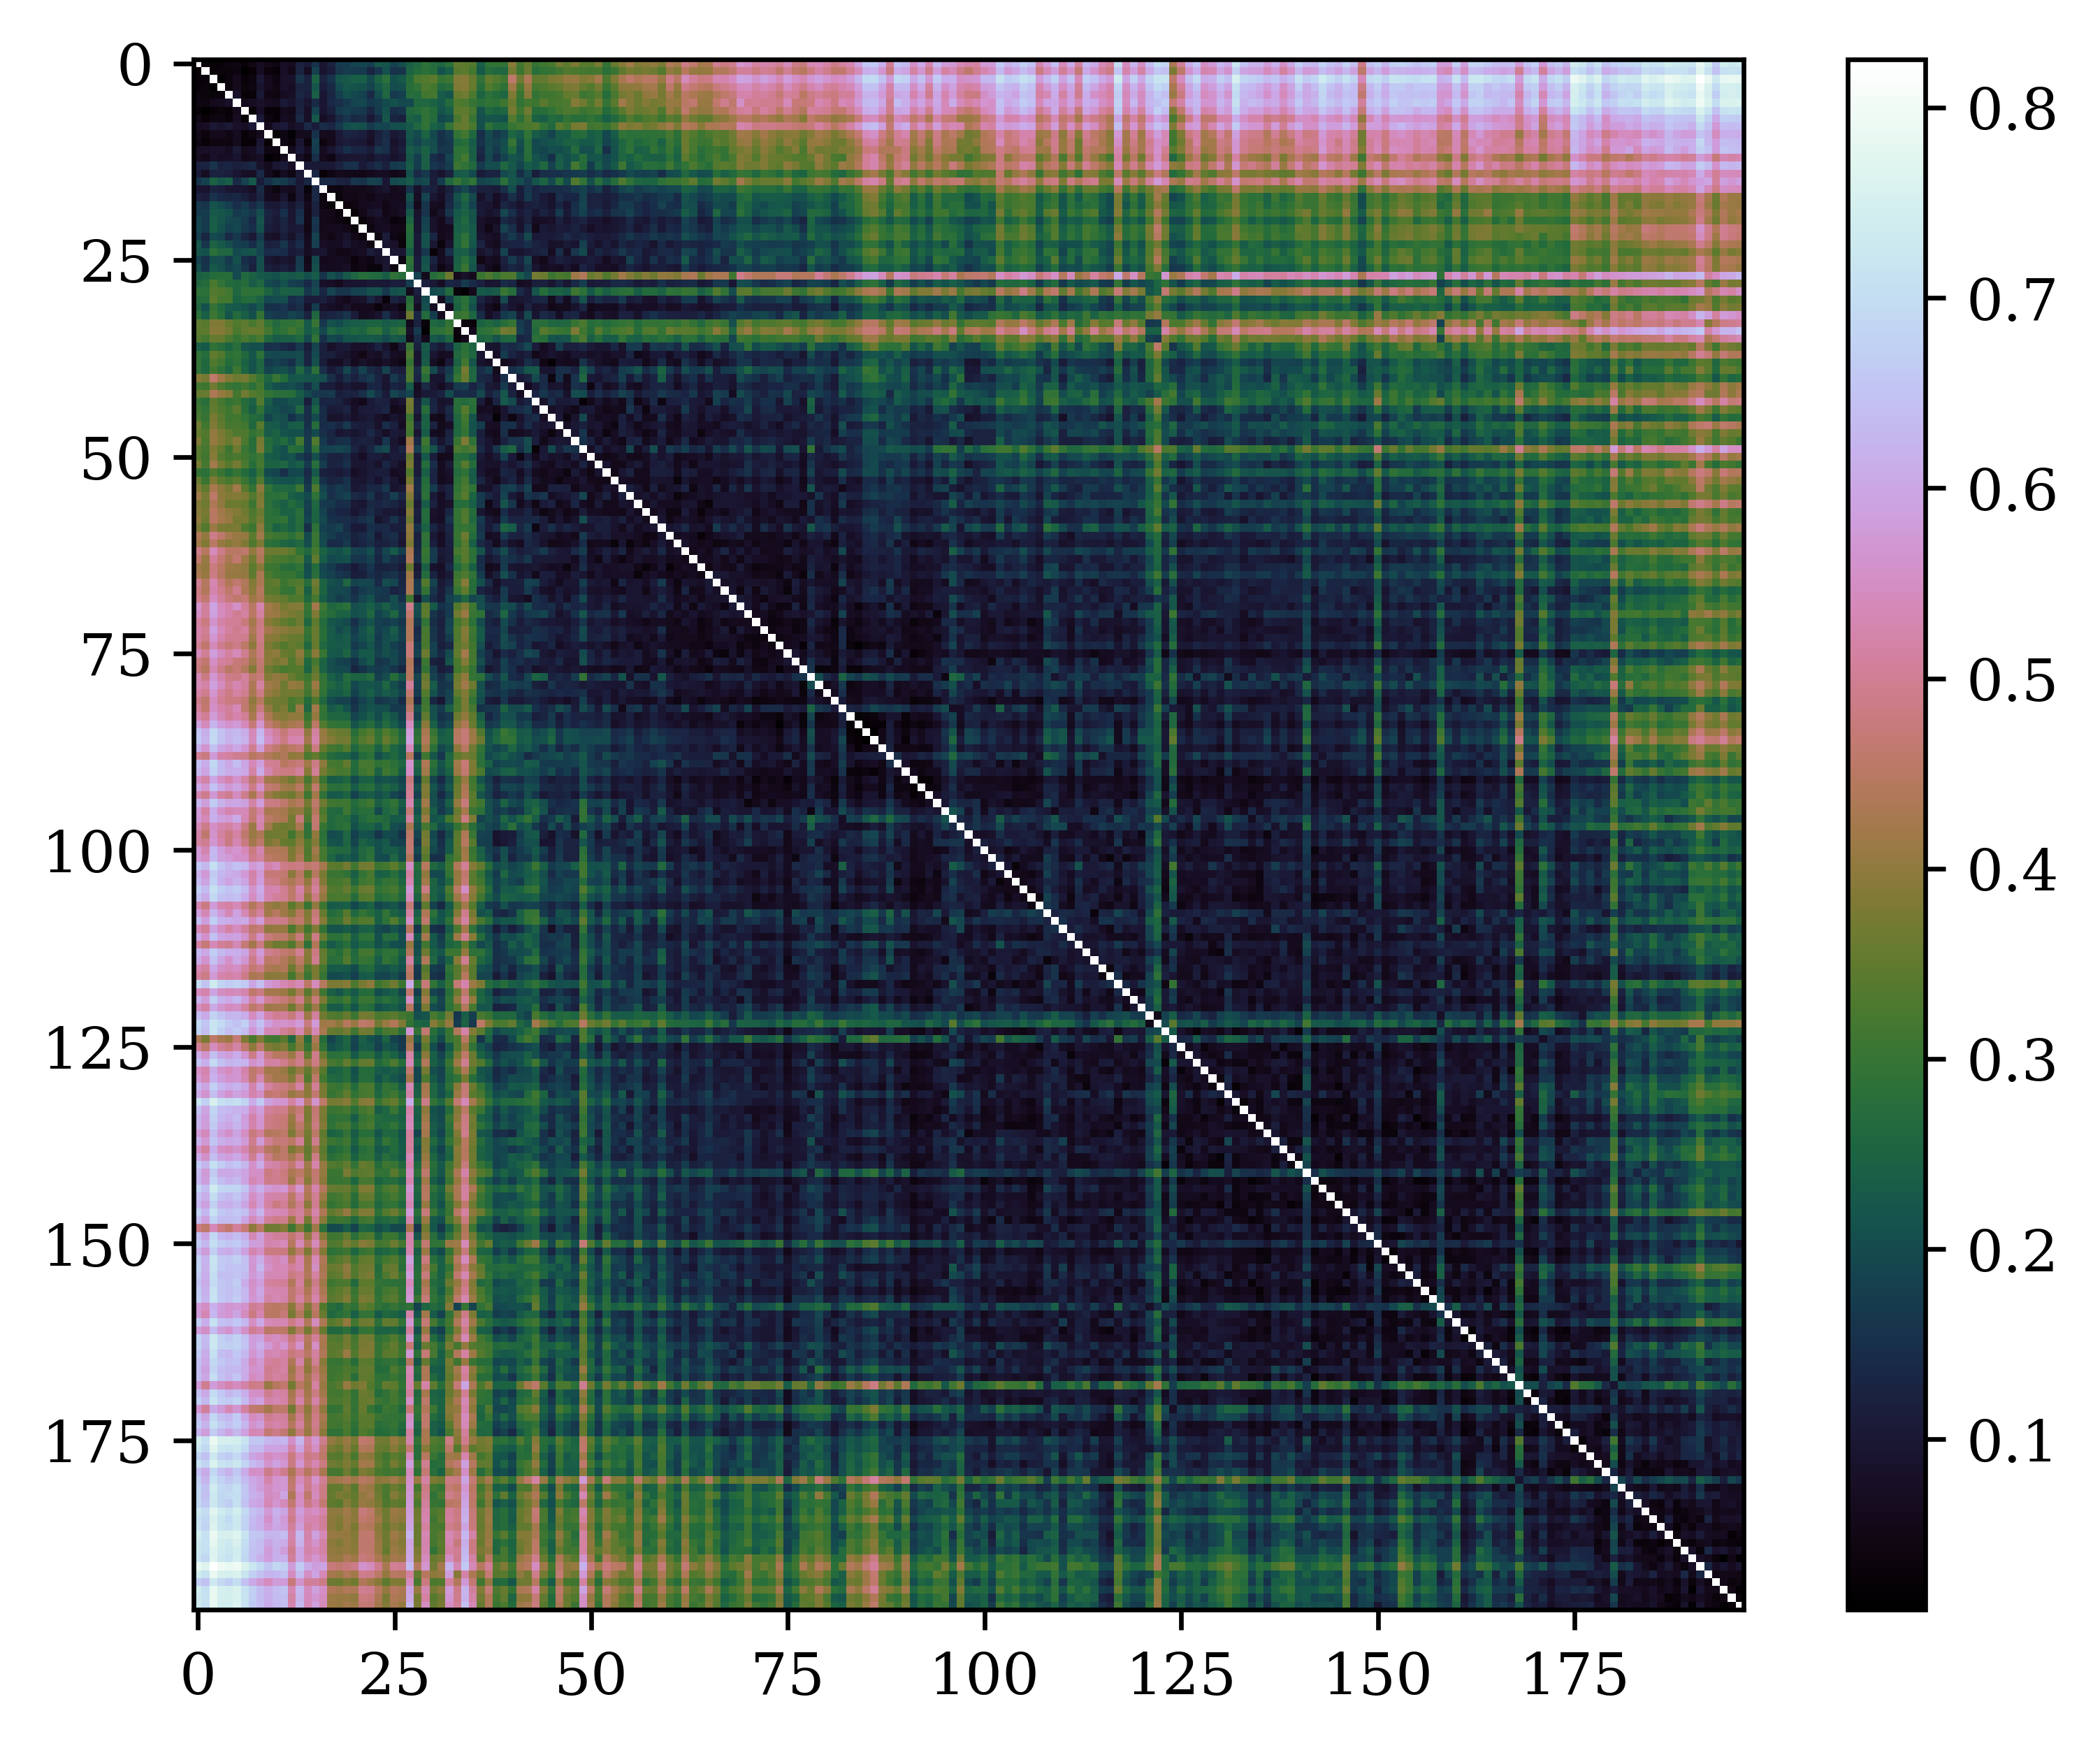

In [19]:
dm = squareform(pdist(df.sort_values(by='pseudotime_rank').filter(regex=r'\d'), metric='cosine'))
dm[np.diag_indices_from(dm)] = np.nan

plt.imshow(dm, cmap='cubehelix')
plt.colorbar()